
# Lecture 3: OLS Estimator for Simple Linear Regression (SLR)
# (Completed version)

**Overview**  
- Review the OLS estimator for the simple linear regression (SLR) model.

- OLS as the "best-fit" line (minimizes squared errors).

- Manual OLS vs. package OLS.

- Numerical evidence for unbiasedness of OLS via simulation.

---


## 📐 Model vs. Estimator — SLR vs. OLS

- **Model (SLR):**  
  The *theoretical relationship* we assume between variables:  
  $$
  y_i = \beta_0 + \beta_1 x_i + u_i,\quad E[u_i \mid x_i] = 0.
  $$  
  where $(\beta_0, \beta_1)$ are **unknown population parameters**.

- Example: $y$ = test score, $x$ = hours studied, $u$ = other factors (sleep, talent, luck).  
- **How do we know if this is true?** We don’t know for certain — but we choose and defend a model as a useful way to describe how $y$ and $x$ are related.  
- **Model specification matters:** deciding which variables to include and in what form relies on economic reasoning, prior research, and patterns in the data. The goal is to capture the key relationship as closely as possible.  
  - ⚠️ A poorly specified model can lead to biased or misleading estimates, even if OLS is correctly applied. We will discuss this more in future lectures.
- ⚠️ Even with a thoughtful specification, OLS only delivers good results if the **SLR assumptions** also hold — we’ll turn to these later in the lecture.


<hr style="border: 1px dotted #bbb;">



- **Estimator & OLS Estimator:**  
  An *estimator* is **a rule (or formula)** that turns sample data into guesses for the unknown parameters.  

  - The **OLS estimator** chooses $(\hat\beta_0, \hat\beta_1)$ to minimize the average squared gap between the observed $y_i$ and the fitted line.  
  - 🔍 In plain words: among all possible lines, OLS picks the one that “fits the data best” in squared-error terms.  
  - Many other estimators exist, but in this class we focus on OLS (which has nice properties under some stated SLR assumptions).  

<hr style="border: 1px dotted #bbb;">


- **Key distinction:**  
  - 📊 The **model (SLR)** is the *assumption about how the world works* — what we believe links $x$ and $y$.  **[Target]**  
  - 🛠️ The **estimator (OLS)** is the *rule we apply to data* to come up with numbers for those unknown parameters.  It’s our **[Attempt / Guess]** at the target.  

---

## 📦 Required libraries

- [`numpy`](https://numpy.org/) : for numerical operations.

    - [`numpy.random`](https://numpy.org/doc/2.2/reference/random/legacy.html) : for random number generation.
    
- [`pandas`](https://pandas.pydata.org/) : for data manipulation.
- [`statsmodels`](https://www.statsmodels.org/) : for statistical modeling.
- [`matplotlib`](https://matplotlib.org/) : for plotting.


In [1]:
# Let's install and import the required libraries together!
!pip install numpy pandas statsmodels matplotlib --quiet

import numpy as np
import numpy.random as rng
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 

---

## Part A — OLS Refresher

- **Model**
$$
y_i = \beta_0 + \beta_1 x_i + u_i,\quad E[u_i \mid x_i] = 0.
$$


- **OLS idea:**  
Given the data, think of every possible straight line you could draw — each corresponds to a pair $(b_0, b_1)$.  
OLS then **chooses** $(\hat\beta_0, \hat\beta_1)$, the line that makes the average squared errors as small as possible:
$$
(\hat\beta_0, \hat\beta_1) 
= \arg\min_{b_0, b_1} \; \frac{1}{n}\sum_{i=1}^n \big(y_i - b_0 - b_1 x_i\big)^2.
$$


- **Closed-form solution (simple linear regression):**

  - **Slope:**
  $$
  \hat\beta_1 \;=\; \frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2}
  \;=\; \frac{\text{Cov}(x,y)}{\text{Var}(x)}.
  $$  

  - **Intercept:**
  $$
  \hat\beta_0 \;=\; \bar y - \hat\beta_1 \,\bar x.
  $$
<hr style="border: 1px dotted #bbb;">


### Test it out: Manual OLS vs. Package OLS
The best way to see how functions work is to test it on a super easy example.

- Suppose we have data on 5 students’ study hours ($x_i$) and test scores ($y_i$):

$$
\begin{array}{c|c|c}
\text{Student (i)} & \text{Hours Studied }(x_i) & \text{Test Score }(y_i)\\
\hline
1 & 2 & 50\\
2 & 3 & 60\\
3 & 5 & 80\\
4 & 4 & 70\\
5 & 6 & 90\\
\end{array}
$$

- That means in this case we have:
$$
x =
\begin{bmatrix}
2 \\ 3 \\ 5 \\ 4 \\ 6
\end{bmatrix},
\qquad
y =
\begin{bmatrix}
50 \\ 60 \\ 80 \\ 70 \\ 90
\end{bmatrix}.
$$

<hr style="border: 1px dotted #bbb;">


**Manual OLS by hand (simple linear regression):**
$$
\hat\beta_1=\frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2},\qquad
\hat\beta_0=\bar y-\hat\beta_1\bar x.
$$

Compute:
$$
\bar x=\frac{2+3+5+4+6}{5}=4,\quad
\bar y=\frac{50+60+80+70+90}{5}=70.
$$
$$
\hat\beta_1=\frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2}=\frac{100}{10}=10,\qquad
\hat\beta_0=70-10\cdot 4=30.
$$

**Result:** $\hat y = 30 + 10x$.
(Here the points lie exactly on a line, so MSE = 0.)

In [2]:

# Manual OLS calculation
def ols_manual(y, x):

    # Calculate means
    xbar = np.mean(x) # or sum(x)/len(x)
    ybar = np.mean(y) # or sum(y)/len(y)

    # Calculate slope (b1) and intercept (b0)
    b1 = np.sum((x - xbar) * (y - ybar))/np.sum((x - xbar) ** 2) # or covariance(x,y)/variance(x) with np.cov and np.var
    b0 = ybar - b1 * xbar
    return b0, b1

# Package OLS calculation
def ols_sm(y, X):
    X = sm.add_constant(X)
    return sm.OLS(y, X).fit()

# Assign our Sample data
x = np.array([2, 3, 4, 5, 6])
y = np.array([50, 60, 80, 70, 90])

# Fit models on our sample data
b0_manual, b1_manual = ols_manual(y, x)
model_sm = ols_sm(y, x)
b0_sm, b1_sm = model_sm.params
# Display results
print(f"Manual OLS: Intercept = {b0_manual}, Slope = {b1_manual}")
print(f"Package OLS: Intercept = {b0_sm}, Slope = {b1_sm}")

#Oops, it doesn't look right. Let's de-bug it together!

Manual OLS: Intercept = 34.0, Slope = 9.0
Package OLS: Intercept = 33.99999999999998, Slope = 9.000000000000009


MSE (Manual OLS) = 38.000


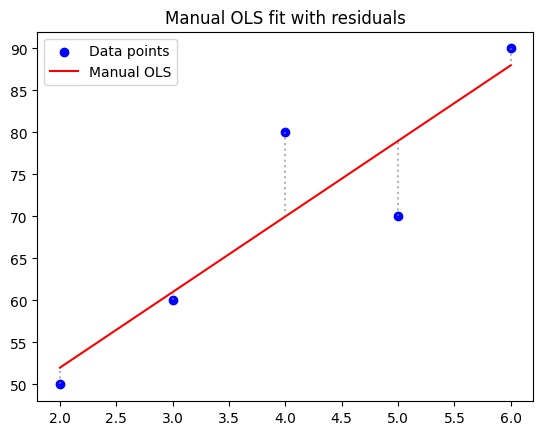

In [3]:
# Manual OLS fit (already computed)
yhat_manual = b0_manual + b1_manual * x
resid_manual = y - yhat_manual
mse_manual = np.mean(resid_manual**2)
print(f"MSE (Manual OLS) = {mse_manual:.3f}")

# Plot with residuals
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, yhat_manual, color='red', label='Manual OLS')

# draw residual lines
for xi, yi, yhat in zip(x, y, yhat_manual):
    plt.vlines(xi, yi, yhat, color='gray', linestyle=':', alpha=0.6)

plt.legend()
plt.title("Manual OLS fit with residuals")
plt.show()


MSE (Alternative line) = 380.000


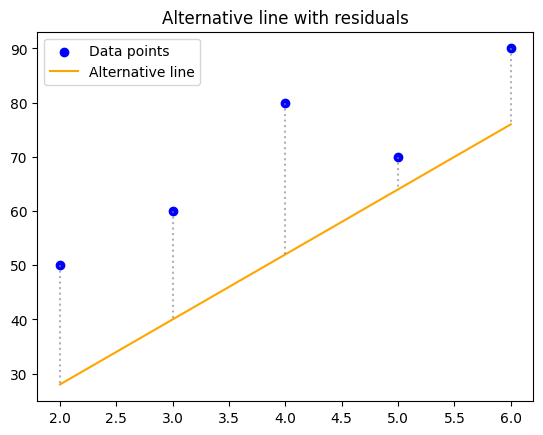

In [4]:
# --- Try an different alternative lines ---

# Alternative line parameters
b0_alt = 4 
b1_alt = 12

# Calculate predictions, residuals, and MSE for alternative line
yhat_alt = b0_alt + b1_alt * x
resid_alt = y - yhat_alt
mse_alt = np.mean(resid_alt**2)
print(f"MSE (Alternative line) = {mse_alt:.3f}")

# Plot alternative line with residuals
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, yhat_alt, color='orange', label=f'Alternative line')

# draw residual lines for alternative
for xi, yi, yhat in zip(x, y, yhat_alt):
    plt.vlines(xi, yi, yhat, color='gray', linestyle=':', alpha=0.6)

plt.legend()
plt.title("Alternative line with residuals")
plt.show()

<hr style="border: 1px dotted #bbb;">

### 📝 Try it yourself!

- You can experiment by plugging in different values of $b_0$ and $b_1$ and checking how the mean squared error (MSE) changes.

-  The **OLS estimator** is simply the choice of $(b_0, b_1)$ that makes the MSE as small as possible.  

- Because of **Assumption SLR.3 (sample variation in $x$)**, this solution is **unique**: there is exactly one line that minimizes the MSE.  

You can try to **challenge OLS** 💪 by picking different lines and comparing their MSE 📉 to the OLS line.  

No matter what numbers you try, OLS will always give the line with the ✨ **smallest possible MSE**.






---

## Part B - Data Generating Process (DGP) & Numerical Evidence for Theorems

### 🤔 How do we know OLS is any good?

- In real life, we never know the **true model** that generates the data  
  (e.g., the exact way study hours relate to test scores).

- So how can we check whether OLS is actually doing a good job  
  (having good properties such as recovering the true parameter)?

<hr style="border: 1px dotted #bbb;">

### 🔢 Numerical evidence via simulation 

We can prove properties (like unbiasedness) in theory class, but we can also **show them numerically** using a **Data Generating Process (DGP):**

- 🎯 **Design a simple “true” model (DGP) with known parameters:**  

  Pick the form and the numbers you want to be true, e.g.
  $$
  y = \beta_0 + \beta_1 x + u,\quad u \sim \mathcal{N}(0,\sigma^2),
  $$
  with $\beta_0=2$, $\beta_1=1.5$, $\sigma=2$.

- 🔨 **Simulate** many datasets from that model.  

- 📊 **Estimate** OLS each time and examine the sampling distribution of $\hat\beta_1$.  

💡 Intuition: simulation is like running a **lab experiment in econometrics**.  

We control the world, we know the truth, and we can see how well OLS performs under different conditions.

This gives us a **controlled world 🌍** where the truth is known —  a benchmark for evaluating how well our estimator works.

---


## Part C — Assumptions for Simple Linear Regression (SLR) and Unbiasedness of OLS

Today, we will show **numerical evidence** for **Theorem 2.1 (Unbiasedness of OLS)**.

<hr style="border: 1px dotted #bbb;">

### 📖 Recall: Theorem 2.1 (Unbiasedness of OLS)

If assumptions (**SLR.1–SLR.4**) hold, then the OLS estimators are **unbiased**:
$$
E[\hat\beta_0] = \beta_0, 
\qquad 
E[\hat\beta_1] = \beta_1.
$$

- ✅ On average, across many random samples, OLS recovers the true parameters.  
- ❌ If an assumption is violated (especially SLR.4, exogeneity), the expectation shifts → **bias**.

<hr style="border: 1px dotted #bbb;">

#### 🏫 In today's lecture  
We will focus on the **baseline DGP** where *all four assumptions hold*.  
This will let us **see Theorem 2.1 in action**: the distribution of $\hat\beta_1$ centers on the true $\beta_1$.  

<hr style="border: 1px dotted #bbb;">

#### 🧪 In Lab Exercise (for you to try)  
You will **experiment with breaking the assumptions one by one** to see what happens:  
- Nonlinearity → violates **SLR.1**  
- Non-random sampling → violates **SLR.2**  
- No variation in $x$ → violates **SLR.3**  
- Exogeneity failure (omitted variable) → violates **SLR.4**

Each violation changes how OLS behaves — you’ll explore this hands-on in the lab exercise.

<hr style="border: 1px dotted #bbb;">








### **Step 1. Construct Baseline DGP (all assumptions hold)**
- We start with a simple DGP where all assumptions (SLR.1–SLR.4) hold.



#### 📖 Assumptions for SLR (recap)

> **SLR.1 — Linear in parameters**  
> Model is linear in the unknown coefficients:  
> $$
> y_i = \beta_0 + \beta_1 x_i + u_i
> $$

> **SLR.2 — Random sampling**  
> The pairs $(x_i, y_i)$ are a random sample from the population.  

> **SLR.3 — Sample variation in the explanatory variable**  
> The regressor varies in the sample: not all $(x_i)$ are the same.  

> **SLR.4 — Zero conditional mean (exogeneity)**  
> $$
> E[u_i \mid x_i] = 0
> $$



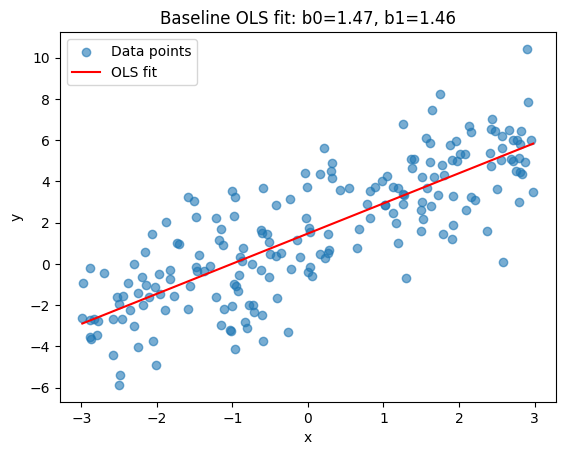

In [5]:
# Construct a Baseline DGP where all assumptions hold (SLR.1–SLR.4)

# Setting 1: sample size
n = 200

# Setting 2: true parameters
beta0_true, beta1_true = 2.0, 1.5
sigma = 2

# Setting 3: ****** define DGP *******
x = np.random.uniform(-3, 3, size=n) #(this ensures SLR.3 and SLR.2 hold)
u = np.random.normal(0, sigma, size=n) # (this ensures SLR.4 holds)
y = beta0_true + beta1_true*x + u   # (this ensures SLR.1 and SLR.2 hold)

# this gives **one** sample set of n observations from the DGP

# let's plot it
b0_m, b1_m = ols_manual(y, x)                    # fit OLS on this sample data (Oops, it doesn't look right. Let's de-bug it together!)
plt.scatter(x, y, alpha=0.6, label="Data points")
xg = np.linspace(x.min(), x.max(), 100)
plt.plot(xg, b0_m + b1_m*xg, color='red', label="OLS fit")
plt.title(f"Baseline OLS fit: b0={b0_m:.2f}, b1={b1_m:.2f}") # compare to true values beta0_true, beta1_true
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()


> **Note:** This is **one random sample** from the DGP.  
> - Blue dots = simulated data.  
> - Solid line = OLS fit from this sample.  
> - Dashed line = true model.  
>
> 👉 Even when OLS is unbiased *on average*, any **single sample** may not exactly match the true slope.


### **Step 2. Simulation check**

#### 🔁 From one sample to many samples

In the previous plot, we only saw **one random sample**.  
But OLS is unbiased *on average* across many random samples.

👉 Let’s simulate many datasets (e.g., 1000) from the same DGP,  
estimate $\hat\beta_1$ each time, and look at the distribution.

If Theorem 2.1 holds, the **average of the estimates** should be very close to the true $\beta_1$.



In [6]:
# Monte Carlo: check mean of many slope estimates

# Setting 1: number of random samples (lets you see the unbiasedness in action via LLN (the average estimate converges to truth))
B = 1000

# Setting 2: sample size per dataset (affects the precision (variance) of each estimate.)
n = 200

# Setting 3: true parameters
beta0_true, beta1_true = 2.0, 1.5
sigma = 2.0

# Create a empty list to store slope estimates
b1_estimates = []

# Simulate B datasets
# Repeat B times: generate data, fit OLS, store slope estimate
for _ in range(B):

    # x is randomly sampled from uniform(-3, 3)
    x = rng.uniform(-3, 3, size=n)

    # u is randomly sampled from normal(0, sigma)
    u = rng.normal(0, sigma, size=n)

    # y is generated from the DGP
    y = beta0_true + beta1_true*x + u

    # Fit OLS and store the slope estimate
    b0, b1 = ols_manual(y, x)

    # Append the slope estimate to the list
    b1_estimates.append(b1)

print(f"True β1 = {beta1_true:.2f}")
print(f"Mean of estimated slopes over {B} samples = {np.mean(b1_estimates):.3f}")

True β1 = 1.50
Mean of estimated slopes over 1000 samples = 1.507


✅ The mean of estimated slopes across **different sets of samples** is very close to the true value of $\beta_1$.  

✅ This is **numerical evidence for Theorem 2.1 (Unbiasedness of OLS)**.

---


## 🔄 Quick Recap

- We built a **baseline DGP** that satisfies all four assumptions (SLR.1–SLR.4).  
- From a **single sample**, OLS can look off — but across **many samples**,  
  the average estimate matches the true slope → **Theorem 2.1 (Unbiasedness of OLS)**.  
- Each assumption has a clear role:  
  - 📐 **SLR.1 Linear in parameters** → we can fit a straight-line model in betas.  
  - 🎲 **SLR.2 Random sampling** → ensures estimates generalize to the population.  
  - 📊 **SLR.3 Variation in x** → slope is identifiable (unique).  
  - 🔍 **SLR.4 Zero conditional mean** → key for unbiasedness.  
- 💡 If an assumption breaks, OLS can become biased, unstable, or misleading.  

👉 Next: In lab, you’ll **break each assumption one by one** and see how OLS behaves in practice.


---


## References & Acknowledgments

- J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach, Cengage Learning, 6th edition.

- This teaching material was prepared with the assistance of **OpenAI's ChatGPT (GPT-5)**.

---

**End of lecture notebook.**